Importer les librairies

In [1]:
# Librairies pour manipuler les données
import pandas as pd
import numpy as np

# Librairies pour visualiser
import matplotlib.pyplot as plt
import seaborn as sns

# Librairies pour machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Pour afficher les graphiques dans le notebook
%matplotlib inline


Charger le dataset

In [6]:
from google.colab import files
import pandas as pd

# Ouvre une fenêtre pour choisir le fichier
uploaded = files.upload()

# Récupérer le nom du fichier téléchargé
filename = list(uploaded.keys())[0]

# Charger le dataset
data = pd.read_csv(filename)
data.head()


Saving train.csv to train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Explorer les données (EDA)

In [8]:
# Statistiques descriptives
data.describe()
# Sélectionner uniquement les colonnes numériques
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Vérifier les valeurs manquantes
missing = numeric_data.isnull().sum()
print("Valeurs manquantes :", missing[missing > 0])

# Statistiques descriptives
numeric_data.describe()


Valeurs manquantes : LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Prétraitement des données

In [9]:
# Remplacer les valeurs manquantes pour les numériques
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].median(), inplace=True)

# Remplacer les valeurs manquantes pour les textes
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna("Unknown", inplace=True)
    data[col] = LabelEncoder().fit_transform(data[col])

# Normaliser toutes les colonnes
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Id'])), columns=data.drop(columns=['Id']).columns)


/tmp/ipython-input-1431390871.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
/tmp/ipython-input-1431390871.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Séparer X et y et créer l’entraînement/test

In [10]:
X = data_scaled.drop(columns=['SalePrice'])
y = data_scaled['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Entraîner les modèles

In [11]:
# 1️⃣ Régression linéaire
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

# 2️⃣ Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# 3️⃣ XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)


Évaluer les modèles

In [12]:
def evaluate(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

print("Régression Linéaire :", evaluate(y_test, lr_pred))
print("Random Forest      :", evaluate(y_test, rf_pred))
print("XGBoost            :", evaluate(y_test, xgb_pred))


Régression Linéaire : (np.float64(0.43514729427461296), 0.8443077433104911)
Random Forest      : (np.float64(0.3561018766736782), 0.8957339398047649)
XGBoost            : (np.float64(0.32180696624444893), 0.9148498688872351)


Visualiser les prédictions

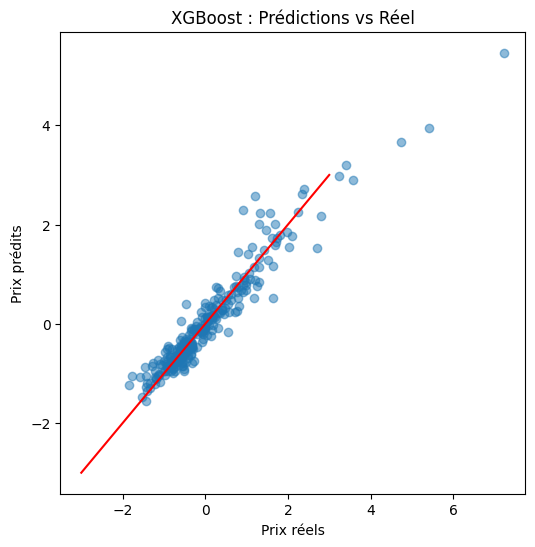

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, xgb_pred, alpha=0.5)
plt.xlabel("Prix réels")
plt.ylabel("Prix prédits")
plt.title("XGBoost : Prédictions vs Réel")
plt.plot([-3,3], [-3,3], color='red')  # ligne parfaite
plt.show()
